<a href="https://colab.research.google.com/github/chararchter/intent-detection/blob/master/test_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install transformers
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import os
from pathlib import Path
from typing import List

import tensorflow as tf
from keras.layers import (Dense, Conv1D)
from keras.models import Sequential
from transformers import BertTokenizer, TFBertModel

import matplotlib.pyplot as plt

# Read the natural language understanding dataset and BERT model

Clone the repos inside intent-detection directory
```
git clone https://github.com/tilde-nlp/NLU-datasets.git
git clone https://huggingface.co/bert-base-multilingual-cased
```

Directory tree should be as follows
```
/intent-detection
├── NLU-datasets
├── bert-base-multilingual-cased
├── run-on-windows.ipynb
```

In [19]:
# load the training data
if not os.path.isfile("chatbot_train_q.txt"):
  !wget https://raw.githubusercontent.com/tilde-nlp/NLU-datasets/master/chatbot/en/chatbot_train_q.txt

In [20]:
with open("chatbot_train_q.txt", "r") as f:
  en_train = f.readlines()

en_train

["what's the shortest connection between quiddestraße and odeonsplatz?\n",
 'what is the cheapest connection between quiddestraße and hauptbahnhof?\n',
 "what's the shortest way between hauptbahnhof and odeonsplatz?\n",
 'how can i get from garching to münchner freiheit as fast as possible?\n',
 "what's the cheapest way from neuperlach süd to lehel?\n",
 'how can i get from neuperlach zentrum to karlsplatz as fast as possible?\n',
 'could you give me the fastest connection between brudermühlstraße and alte heide?\n',
 'is there a train from neuperlach zentrum to garching at 3 pm?\n',
 'can you find a connection from olympiazentrum to lehel at 2 pm?\n',
 'i need a connection from harras to karl-preis-platz at 8 am.\n',
 '"in need to be at hauptbahnhof at 1 pm, can you search a connection from garching forschungszentrum?"\n',
 'i need to be in garching at 9\n',
 'can i take a bus from quiddestraße to hauptbahnhof?\n',
 'can you find the shortest way from moosfeld to milbertshofen?\n',
 '

In [21]:
# load the labels
if not os.path.isfile("chatbot_train_ans.txt.1"):
  !wget https://raw.githubusercontent.com/tilde-nlp/NLU-datasets/master/chatbot/chatbot_train_ans.txt

In [22]:
with open("chatbot_train_ans.txt.1", "r") as f:
  train_answers = f.readlines()

train_answers

['FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'DepartureTime\n',
 'FindConnection\n',
 'FindConnection\n',
 'DepartureTime\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'FindConnection\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'DepartureTime\n',
 'Departure

In [23]:
def split_line_endings(array_with_line_endings: List[str]) -> List[str]:
    array = []
    for line in array_with_line_endings:
        array.append(line.split('\n')[0])
    return array

In [24]:
en_train = split_line_endings(en_train)
en_train

["what's the shortest connection between quiddestraße and odeonsplatz?",
 'what is the cheapest connection between quiddestraße and hauptbahnhof?',
 "what's the shortest way between hauptbahnhof and odeonsplatz?",
 'how can i get from garching to münchner freiheit as fast as possible?',
 "what's the cheapest way from neuperlach süd to lehel?",
 'how can i get from neuperlach zentrum to karlsplatz as fast as possible?',
 'could you give me the fastest connection between brudermühlstraße and alte heide?',
 'is there a train from neuperlach zentrum to garching at 3 pm?',
 'can you find a connection from olympiazentrum to lehel at 2 pm?',
 'i need a connection from harras to karl-preis-platz at 8 am.',
 '"in need to be at hauptbahnhof at 1 pm, can you search a connection from garching forschungszentrum?"',
 'i need to be in garching at 9',
 'can i take a bus from quiddestraße to hauptbahnhof?',
 'can you find the shortest way from moosfeld to milbertshofen?',
 'how can i get to neuperlach 

In [25]:
train_answers = split_line_endings(train_answers)
train_answers

['FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'DepartureTime',
 'FindConnection',
 'FindConnection',
 'DepartureTime',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'FindConnection',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',
 'DepartureTime',

In [26]:
assert len(train_answers) == len(en_train)

In [27]:
# define model and tokenizer
model_name = "bert-base-multilingual-cased" # loading from huggingface
# model_name = "./bert-base-multilingual-cased" # loading from local path

tokenizer = BertTokenizer.from_pretrained(model_name)
model_bert = TFBertModel.from_pretrained(model_name)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


# Define classifier

In [28]:
def create_model_one_layer(sentence_length: int, units: int = 2, hidden_size: int = 768):
    """
    returns <tf.Tensor: shape=(1, 1, units), dtype=float32>
    e.g. <tf.Tensor: shape=(1, 1, 2), dtype=float32>
    where 2 = units
    """
    model = Sequential()
    model.add(tf.keras.Input(shape=(sentence_length, hidden_size)))
    model.add(Dense(units, activation='softmax'))
    model.add(Conv1D(units, sentence_length, padding="valid", activation="softmax"))
    model.add(Dense(units, activation='softmax'))
    return model


def create_adam_optimizer(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0, epsilon=None, amsgrad=False):
    # TODO: Replace legacy optimizer with current version of Adam
    return tf.keras.optimizers.legacy.Adam(learning_rate=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)


# use keras.to_categorical() instead
def encode_labels(answers: List) -> List:
    """ Encode labels in one hot-encoding
    'FindConnection' corresponds to [[1, 0]]
    'DepartureTime' corresponds to [[0, 1]]
    """
    y = []
    for answer in answers:
        if answer == 'FindConnection':
            y.append([[1, 0]])
        else:
            y.append([[0, 1]])
    return y

In [29]:
labels = encode_labels(train_answers)

# Test on a small example

## Sentence -> word embedding

In [30]:
batch_size = 4
sentence_length = 20

text = en_train[0:batch_size]
encoded_input = tokenizer(text, padding='max_length', max_length=sentence_length, truncation=True, return_tensors='tf')
encoded_input

{'input_ids': <tf.Tensor: shape=(4, 20), dtype=int32, numpy=
array([[  101, 12976,   112,   187, 10105, 13716, 13051, 31671, 10948,
        10355, 22243, 21272, 10111, 10311, 27572, 54609, 86255,   136,
          102,     0],
       [  101, 12976, 10124, 10105, 10262, 16070, 13051, 31671, 10948,
        10355, 22243, 21272, 10111, 20091, 14971, 92925,   136,   102,
            0,     0],
       [  101, 12976,   112,   187, 10105, 13716, 13051, 13170, 10948,
        20091, 14971, 92925, 10111, 10311, 27572, 54609, 86255,   136,
          102,     0],
       [  101, 14796, 10944,   177, 15329, 10188, 47243, 41247, 10114,
          181, 18913, 60260, 42109, 15543, 10146, 15040, 10146, 14128,
          136,   102]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(4, 20), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [31]:
# odict_keys(['last_hidden_state', 'pooler_output'])
inputs = model_bert(encoded_input)["last_hidden_state"]
inputs.shape

TensorShape([4, 20, 768])

## Word embedding -> class

In [32]:
learning_rate = 0.03
optimizer = create_adam_optimizer(lr=learning_rate)
classification_model = create_model_one_layer(sentence_length=sentence_length)

classification_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# initial probabilities
classification_model(inputs)

<tf.Tensor: shape=(4, 1, 2), dtype=float32, numpy=
array([[[0.39163995, 0.60836005]],

       [[0.39105365, 0.6089463 ]],

       [[0.392899  , 0.60710096]],

       [[0.39237696, 0.60762304]]], dtype=float32)>

In [33]:
epochs = 5

labels_expanded = tf.convert_to_tensor(labels[0:batch_size])

classification_model.fit(inputs, y=labels_expanded, epochs=epochs)

Epoch 1/5
1/1 [==============================] - 1s 666ms/step - loss: 0.9365 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 0.7952 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 0.7194 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6561 - accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 0.5997 - accuracy: 1.0000


In [34]:
# view the output of the classification_model: probabilities for labels

classification_model(inputs)

<tf.Tensor: shape=(4, 1, 2), dtype=float32, numpy=
array([[[0.57828104, 0.42171893]],

       [[0.5782809 , 0.4217191 ]],

       [[0.57827973, 0.42172027]],

       [[0.57828075, 0.42171925]]], dtype=float32)>

# Run on English training dataset

In [35]:
batch_size = 25
sentence_length = 20
learning_rate = 0.0003
number_of_epochs = 150

optimizer = create_adam_optimizer(lr=learning_rate)
classification_model = create_model_one_layer(sentence_length=sentence_length)

classification_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
encoded_input = tokenizer(en_train, padding='max_length', max_length=sentence_length, truncation=True, return_tensors='tf')
classification_input = model_bert(encoded_input)["last_hidden_state"]

In [37]:
print(classification_input.shape)
# (100, 20, 768) where
# 100 is number of examples in dataset left after truncation=True
# 20 is sentence_length
# 768 is the default hidden_size value

(100, 20, 768)


In [38]:
labels = encode_labels(train_answers)
labels_expanded = tf.convert_to_tensor(labels)
history = classification_model.fit(classification_input, y=labels_expanded, batch_size=batch_size, epochs=number_of_epochs)
predictions = classification_model(classification_input)
predictions.shape

Epoch 1/150
4/4 [==============================] - 1s 11ms/step - loss: 1.0793 - accuracy: 0.4300
Epoch 2/150
4/4 [==============================] - 0s 8ms/step - loss: 1.0587 - accuracy: 0.4300
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 1.0397 - accuracy: 0.4300
Epoch 4/150
4/4 [==============================] - 0s 9ms/step - loss: 1.0171 - accuracy: 0.4300
Epoch 5/150
4/4 [==============================] - 0s 9ms/step - loss: 0.9946 - accuracy: 0.4300
Epoch 6/150
4/4 [==============================] - 0s 5ms/step - loss: 0.9714 - accuracy: 0.4300
Epoch 7/150
4/4 [==============================] - 0s 15ms/step - loss: 0.9512 - accuracy: 0.4300
Epoch 8/150
4/4 [==============================] - 0s 6ms/step - loss: 0.9309 - accuracy: 0.4300
Epoch 9/150
4/4 [==============================] - 0s 5ms/step - loss: 0.9116 - accuracy: 0.4300
Epoch 10/150
4/4 [==============================] - 0s 5ms/step - loss: 0.8913 - accuracy: 0.4300
Epoch 11/150
4/4 [=========

TensorShape([100, 1, 2])

In [39]:
for i in range(20,30):
  print(train_answers[i], predictions[i])

FindConnection tf.Tensor([[0.6748593  0.32514068]], shape=(1, 2), dtype=float32)
DepartureTime tf.Tensor([[0.1720683 0.8279317]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.6858224  0.31417754]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.6907472  0.30925283]], shape=(1, 2), dtype=float32)
DepartureTime tf.Tensor([[0.1575496 0.8424504]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.6566004  0.34339958]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.68892527 0.31107476]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.68627703 0.31372303]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.67064977 0.3293502 ]], shape=(1, 2), dtype=float32)
FindConnection tf.Tensor([[0.68567157 0.31432837]], shape=(1, 2), dtype=float32)


In [40]:
def plot_performance(data, dataset: str, x_label: str = 'accuracy'):
    plt.plot(data)
    ax = plt.gca()
    ax.set_xlabel('epochs')
    ax.set_ylabel(x_label)
    plt.title(f"model {x_label}")
    plt.savefig(f"{dataset}-{x_label}.png")
    # plt.savefig(f"{dataset}{x_label}.pdf", dpi=150) # pdf for LaTeX
    plt.show()

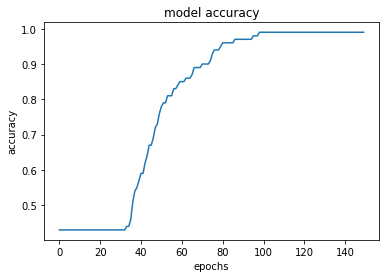

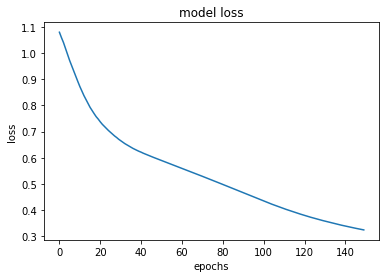

In [41]:
plot_performance(history.history['accuracy'], dataset="en_train", x_label='accuracy')
plot_performance(history.history['loss'], dataset="en_train", x_label='loss')